**Geospatial Analysis with Python - final task**

This document will cover the tasks assigned in the document [\\Users\\tmi\\Python\\GeoSpatFinalTask\final.pdf](C:\\Users\\tmi\\Python\\GeoSpatFinalTask\final.pdf)

In [1]:
#We start by importing the necessary packages

import os
import rasterio as rio
import matplotlib as mlp
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from matplotlib.colors import LogNorm
from numpy import newaxis
from osgeo import gdal
import geopandas as gpd
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda

C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Following the import of necessary packages, we proceed to download the GeoTIFF file, as prompted in the task document. 

In [2]:
'''
We proceed to import the required files. All files are from: Jones, B., and B. C. O'Neill. 2017. 
Global Population Projection Grids Based on Shared Socioeconomic Pathways (SSPs), 2010-2100. 
Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/H4RF5S0P. 
Accessed 26/04/2019
Countries.tif is imported to determine the country, which we will proceed using for our calculation
The urban and total arrays are set up to contain all the files from 2010-2100. This is to ease the 
comparison and plotting of the contents.
'''
urban = ['/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2010.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2020.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2030.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2040.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2050.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2060.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2070.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2080.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2090.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Urban/GeoTIFF/ssp4urb2100.tif']

total = ['/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2010.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2020.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2030.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2040.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2050.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2060.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2070.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2080.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2090.tif', 
         '/Users/tmi/Python/GeoSpatFinalTask/SSP4/Total/GeoTIFF/ssp4_2100.tif']

countries = rio.open('/Users/tmi/Python/GeoSpatFinalTask/countries.tif') 
#Here we open the file containing information on the countries 

In [3]:
T = {} #We set up a dictionary for the total population
for filename in total:
    with rio.open(filename, 'r') as src:
        filename = os.path.basename(filename)[:-4] 
        #Here the filenames are shortened,
        #and we remove the need for the file extension
        T[filename] = src.read(1)  
        #We do not require the depth of the layer to perform our calculations - 
        #this is removed here. For dictionaries, the filenames are appended automatically, 
        #as each new input is a new line in the dictionary
        
U = {} #We perform the same operations as above, however this time for the Urban population
for filename in urban:
    with rio.open(filename, 'r') as src:
        filename = os.path.basename(filename)[:-4]
        U[filename] = src.read(1)

## Assignment 1a

For this assignment, I will focus on the country (Island nation) of Palau

In [4]:
'''
Data for shapefile of the world comes from naturalearthdata.com
'''

country = countries.read(1) #Choosing the layer of the file, which contains the numbers of the countries

Palau = country == 585 # We define the country code for Palau, to determine the coordinates from the layer
Palau1 = np.where(Palau == 1) # Here we choose only the cells, which are true for having code 585

In [5]:
#Calculating the sum of the urban population for each decade from 2010 to 2100 for the country of Palau. 
#This is done by performing a summation for all the cells determined as Palau with the matching cells 
#in the individual decade file.
upop10 = np.sum(U['ssp4urb2010'][Palau1])
upop20 = np.sum(U['ssp4urb2020'][Palau1])
upop30 = np.sum(U['ssp4urb2030'][Palau1])
upop40 = np.sum(U['ssp4urb2040'][Palau1])
upop50 = np.sum(U['ssp4urb2050'][Palau1])
upop60 = np.sum(U['ssp4urb2060'][Palau1])
upop70 = np.sum(U['ssp4urb2070'][Palau1])
upop80 = np.sum(U['ssp4urb2080'][Palau1])
upop90 = np.sum(U['ssp4urb2090'][Palau1])
upop100 = np.sum(U['ssp4urb2100'][Palau1])

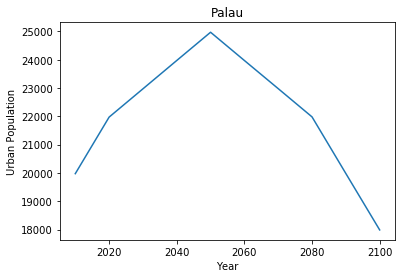

In [6]:
#Setting up the arrays for the plotting the urban population

Urban = [upop10,upop20,upop30,upop40,upop50,upop60,upop70,upop80,upop90,upop100] #Our y-axis, containing the population
Year = [2010,2020,2030,2040,2050,2060,2070,2080,2090,2100] #Our x-axis, defining the years
plt.plot(Year,Urban) 
plt.ylabel('Urban Population') #Naming the y-axis
plt.xlabel('Year') #Naming the x-axis
plt.title('Palau') #Giving the chart a title
plt.show()

After calculating the urban population, we proceed to perform the same calculations for the total population. As we are using many of the already defined variables, we will jump right into calculations of the population of Palau

In [7]:
#Calculating the sum of the total population for each decade from 2010 to 2100 for the country of Palau. 
#This is done by performing a summation for all the cells determined as Palau with the matching cells 
#in the individual layers.

tpop10 = np.sum(T['ssp4_2010'][Palau1])
tpop20 = np.sum(T['ssp4_2020'][Palau1])
tpop30 = np.sum(T['ssp4_2030'][Palau1])
tpop40 = np.sum(T['ssp4_2040'][Palau1])
tpop50 = np.sum(T['ssp4_2050'][Palau1])
tpop60 = np.sum(T['ssp4_2060'][Palau1])
tpop70 = np.sum(T['ssp4_2070'][Palau1])
tpop80 = np.sum(T['ssp4_2080'][Palau1])
tpop90 = np.sum(T['ssp4_2090'][Palau1])
tpop100 = np.sum(T['ssp4_2100'][Palau1])

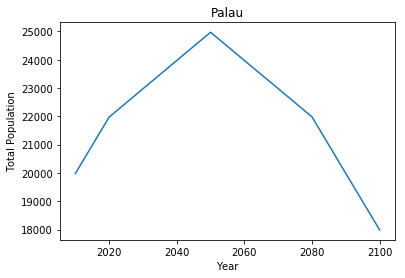

In [8]:
#Setting up the arrays for the plotting the total population

Total = [tpop10,tpop20,tpop30,tpop40,tpop50,tpop60,tpop70,tpop80,tpop90,tpop100] #Our y-axis, containing the population
Year = [2010,2020,2030,2040,2050,2060,2070,2080,2090,2100] #Our x-axis, defining the years
plt.plot(Year,Total) 
plt.ylabel('Total Population') #Naming the y-axis
plt.xlabel('Year') #Naming the x-axis
plt.title('Palau') #Giving the chart a title
plt.show()

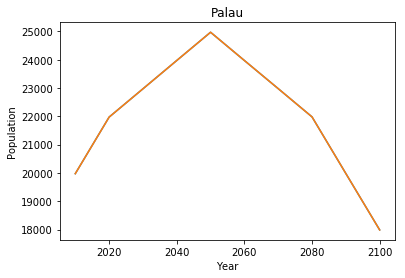

In [9]:
#Comparing the two charts

plt.plot(Year,Total) 
plt.plot(Year, Urban)
plt.ylabel('Population') #Naming the y-axis
plt.xlabel('Year') #Naming the x-axis
plt.title('Palau') #Giving the chart a title
plt.show()

It is noted that only one line can be seen. The code has been debugged and tested with other countries. The plotting is correct - all cells on Palau are defined as Urban

## Assignment 1B ## 
Here we show the countries, which suffer a population decline from 2010 to 2100.

In [10]:
Pop10 = T['ssp4_2010'] #Defining a variable for the total number of people in 2010
Pop100 = T['ssp4_2100'] #Defining a variable for the total number of people in 2100

popcomp = Pop10 - Pop100 #Calculating all the cells, which suffer a population decline

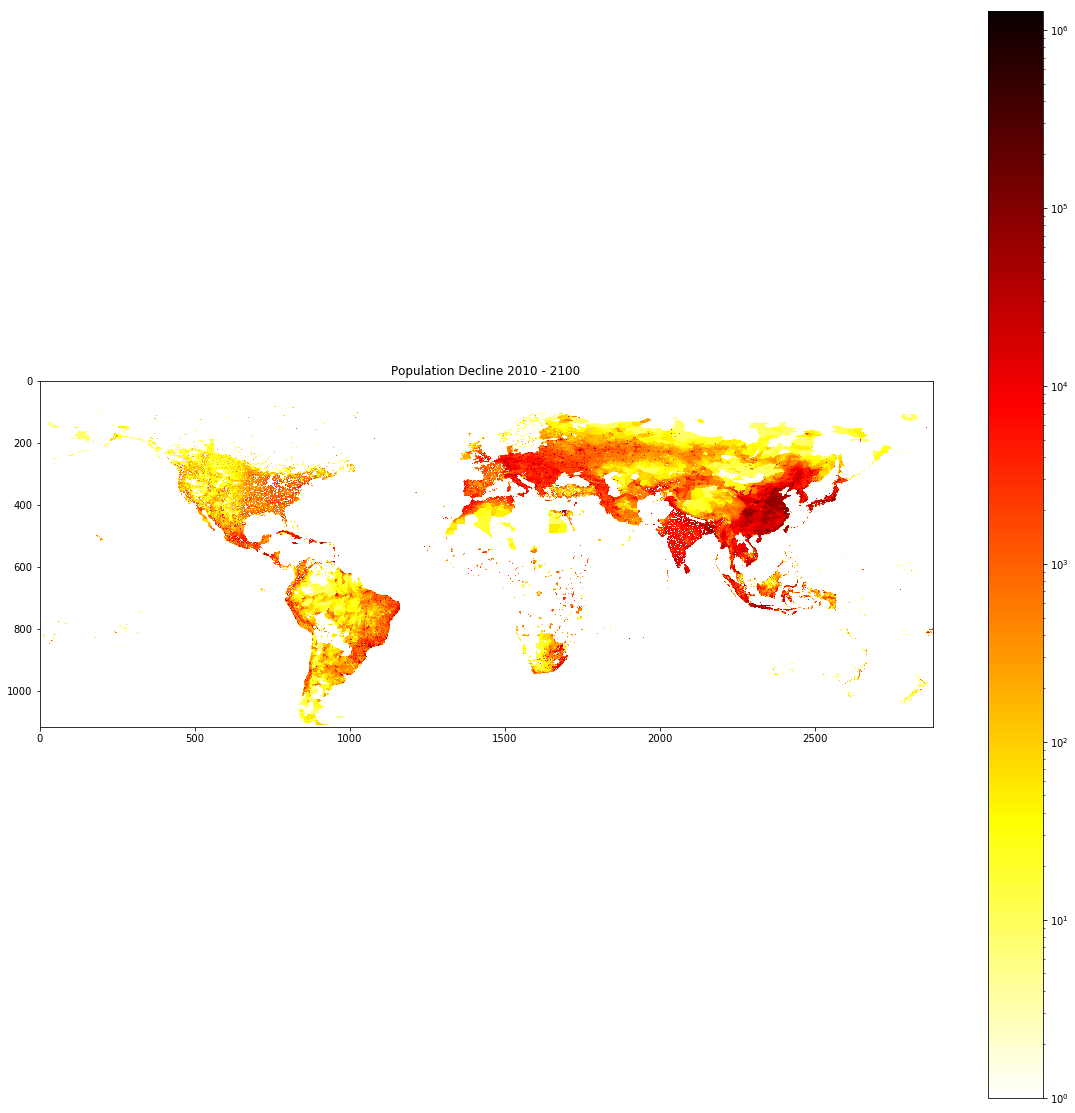

In [11]:
#We proceed to plot a raster, showing all the cells, which suffer a decline.
plt.figure(figsize=(20, 20))
plt.title('Population Decline 2010 - 2100')
imgplot = plt.imshow(popcomp, norm=LogNorm(), cmap='hot_r')
plt.colorbar()

## Assignment 2a
Loading an shp file and a csv file, and performing a left join

In [12]:
#We start by importing the two files
u5m = pd.read_csv('/Users/tmi/Python/GeoSpatFinalTask/under5mortality.csv')
world = gpd.read_file('/Users/tmi/Python/GeoSpatFinalTask/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

To create the left join, we use the world1 as our left table, and the under5mortality as our right side. We join on the ISO_A3 column from the left and the ISO column from the right.

In [13]:
#Here we create the variable df, in which we perform the left join.  
df = pd.merge(world, u5m, left_on='ISO_A3', right_on='ISO',  how='left') 

## Assignment 2b
Calculating the spatial weights matrix for the world, based on border neighbourhood, and using the weights to calculate Moran's I for child mortality

In [14]:
#Initially we calculate the Queen's weight, where both shared edges and shared vertices lead to a point.
w_queen = weights.Queen.from_dataframe(df) #Calculating on the df we created earlier
pd.DataFrame(w_queen.full()[0], 
             index=df['ISO'],
             columns=df['ISO'],
            ).astype(float)

C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\pysal\lib\weights\weights.py:168: UserWarning: There are 21 disconnected observations 
  Island ids: 0, 19, 20, 22, 23, 45, 46, 47, 78, 89, 134, 135, 136, 137, 138, 140, 144, 147, 155, 159, 175
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


ISO,FJI,TZA,nan,CAN,USA,KAZ,UZB,PNG,IDN,ARG,...,nan,UGA,RWA,BIH,MKD,SRB,MNE,nan,TTO,SSD
ISO,,,,,,,,,,,,,,,,,,,,,
FJI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KAZ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UZB,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IDN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Having calculated the weights (1 or 0), we proceed to calculate Moran's I

In [15]:
moran = esda.Moran(df['ChildMortality'], w_queen)
(moran.I, moran.p_sim)

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neig

C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\pysal\explore\esda\moran.py:165: RuntimeWarning: invalid value encountered in greater_equal
  above = sim >= self.I


(nan, 0.001)

The above calculation of Moran's I returns NaN. This may be caused by the number being too small for Python to interpret.

Alternatively, there is something wrong with the calculation. To test, we remove all rows, where ISO = NaN.

In [16]:
db = df.dropna(subset = ['ISO']) #We use the built-in function in Pandas "DropNa", to remove all rows where ISO = NaN. 

w_queenNaN = weights.Queen.from_dataframe(db) #Calculating on the df we created earlier
pd.DataFrame(w_queenNaN.full()[0], 
             index=db['ISO'],
             columns=db['ISO'],
            ).astype(float)

C:\Users\tmi\AppData\Local\Continuum\anaconda3\envs\GeoSpatTask\lib\site-packages\pysal\lib\weights\weights.py:168: UserWarning: There are 15 disconnected observations 
  Island ids: 0, 18, 39, 40, 71, 82, 127, 128, 129, 130, 135, 138, 146, 150, 162
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


ISO,FJI,TZA,CAN,USA,KAZ,UZB,PNG,IDN,ARG,CHL,...,ETH,DJI,UGA,RWA,BIH,MKD,SRB,MNE,TTO,SSD
ISO,,,,,,,,,,,,,,,,,,,,,
FJI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CAN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KAZ,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UZB,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IDN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Having removed all rows containing NaN in the ISO column, we calculate Moran's I again:

In [17]:
moranNaN = esda.Moran(db['ChildMortality'], w_queenNaN)
(moranNaN.I, moranNaN.p_sim)

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')


(0.7391687656288461, 0.001)

As seen from the test, it is possible to calculate Moran's I by removing all rows, in which ISO = NaN. Based on the above, we may safely reject the null-hypothesis.